**PixelSense**: Deep Neural Interpretation of Fashion Apparel Images

Problem Statement

In today’s digital retail and e-commerce platforms, a massive volume of product images is generated and stored every day. Accurately categorizing these fashion product images into appropriate apparel classes is essential for effective inventory management, visual search, recommendation systems, and improved customer experience. However, manual classification of such images is time-consuming, error-prone, and not scalable.

- The problem addressed in this project is to automatically classify grayscale fashion images into predefined apparel categories using deep learning techniques, beginning with a baseline Artificial Neural Network (ANN) trained on pixel-level information and extending to a Convolutional Neural Network (CNN) that preserves spatial and hierarchical image features.
- The project aims to analyze the limitations of ANN-based image classification and demonstrate how CNNs improve accuracy and reduce misclassification by learning meaningful visual patterns directly from image data.

# Objectives of the Project

- To load and explore the Fashion-MNIST dataset using tensorflow.keras.

- To preprocess image data through normalization and reshaping.

- To design and train a deep ANN model as a baseline image classifier.

- To evaluate ANN performance using accuracy, classification report, and   confusion matrix.

- To identify ANN limitations in handling spatial image information.

- To design and train a CNN model for improved image feature extraction.

- To compare ANN and CNN performance quantitatively and visually.

- To interpret misclassification patterns among visually similar apparel categories.

In [ ]:
# Import necessary libraries for data manipulation, visualization, and deep learning.
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data() # Load the Fashion-MNIST dataset.

In [ ]:
xtrain.shape# ytrain 60000 # Display the shape of the training data.

(60000, 28, 28)

In [ ]:
xtest.shape #ytest=10000 # Display the shape of the test data.

(10000, 28, 28)

In [ ]:
# train data is of 60,000 image with each image of pixel size 784
#lets find max and min value of pixel
print('Max',xtrain.max())
print('Min',xtrain.min())

Max 255
Min 0


In [ ]:
#Unique labels in xtrain
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
label_names=['Tshirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirts','Sneakers','Bag','Ankle Boot'] # Define class names for the apparel categories.

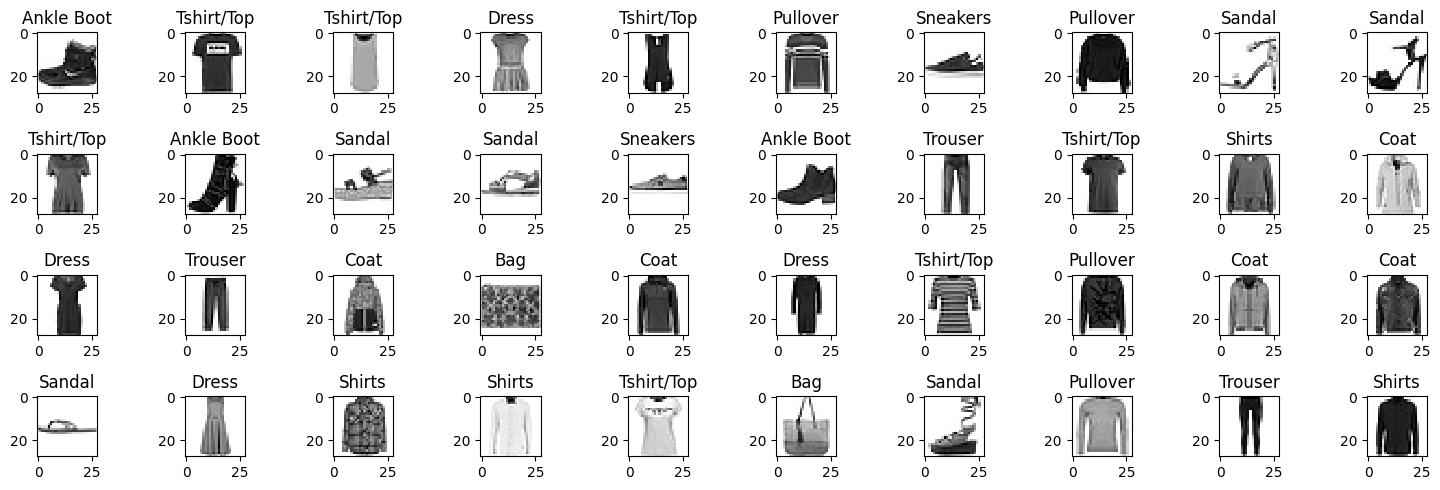

In [ ]:
# lets see images in train data
nrows=4
ncols=10
t=1
plt.figure(figsize=(15,5))
for i in range(nrows*ncols):
  plt.subplot(nrows,ncols,t)
  plt.imshow(xtrain[i],cmap='binary',interpolation='nearest')
  plt.title(f'{label_names[ytrain[i]]}',color='black')
  t+=1
plt.tight_layout()
plt.show()

Data Preprocessing

1. Normalization


In [ ]:
#train data is in 3d we need to reshape to 2d
# we need to scale the value of pixel
#0-255 scale to 0-1

x_train=xtrain/255
x_test=xtest/255

2. ANN Reshaping

In [ ]:
#reshape the data (60,000,28,28)->(60,000,784)
x_train=x_train.reshape(x_train.shape[0],28*28)
x_test=x_test.reshape(x_test.shape[0],28*28)

In [ ]:
x_train.shape # Display the reshaped training data shape.

(60000, 784)

# Netural Network Model

In [ ]:
 # Define and display the architecture ANN model
model=Sequential()
model.add(Dense(1000,input_shape=(784,),activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,396,260 (5.33 MB)

 Trainable params: 1,396,260 (5.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # Compile the ANN model

In [ ]:
model.fit(x_train,ytrain,epochs=20,batch_size=20000) # Train the ANN model on the training data for 20 epochs.

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.2200 - loss: 2.1639
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5507 - loss: 1.4248
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6872 - loss: 0.9540
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7268 - loss: 0.8016
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7543 - loss: 0.6854
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7864 - loss: 0.6110
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7945 - loss: 0.5818
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8127 - loss: 0.5330
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8212 - loss: 0.5119
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8284 - loss: 0.4902
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8175 - loss: 0.5078
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.8335 - loss: 0.4748
Epoch 13/20
3/3 

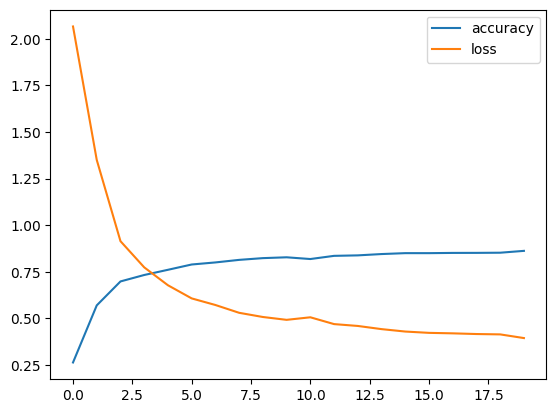

In [ ]:
# we can visualize how the loss has reduced and accuracy has improved
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])
plt.legend(['accuracy','loss'])
plt.show()

In [ ]:
model.evaluate(x_test,ytest) # Evaluate the ANN model's performance on the test data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8538 - loss: 0.4179


[0.4239600598812103, 0.849399983882904]

In [ ]:
# Generate predictions from the ANN model on the test data.
pred_nn=model.predict(x_test)
pred_nn_label=np.argmax(pred_nn,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


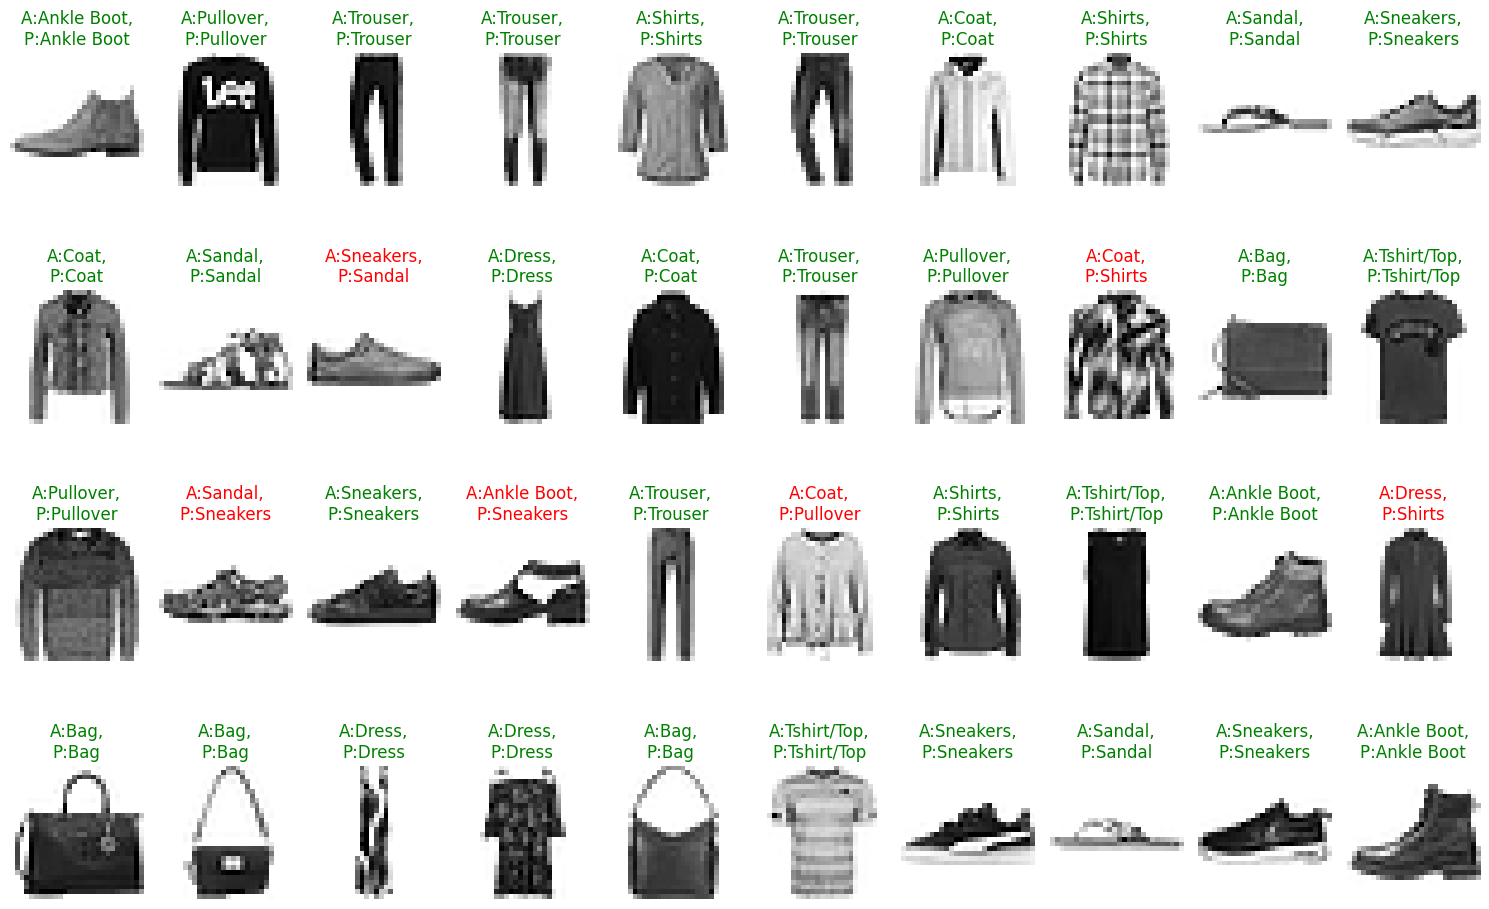

In [ ]:
# lets see images in test data

t=1
plt.figure(figsize=(15,10))
for i in range(40):
  plt.subplot(nrows,ncols,t)
  plt.imshow(xtest[i],cmap='binary',interpolation='nearest')
  actual_label=label_names[ytest[i]]
  predicted=label_names[pred_nn_label[i]]
  color='red' if actual_label!=predicted else 'green'
  plt.title(f'A:{actual_label},\nP:{predicted}',color=color)
  t+=1
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(ytest,pred_nn_label))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.76      0.74      0.75      1000
           3       0.83      0.87      0.85      1000
           4       0.77      0.70      0.73      1000
           5       0.96      0.94      0.95      1000
           6       0.59      0.68      0.63      1000
           7       0.90      0.95      0.92      1000
           8       0.95      0.96      0.95      1000
           9       0.96      0.93      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000




Interpretation:

The ANN achieved an overall accuracy of 85% and demonstrated strong performance on visually distinct apparel categories. However, it struggled to differentiate between visually similar upper-body garments due to the loss of spatial information caused by image flattening, highlighting the limitations of ANN for image classification tasks.


<Axes: >

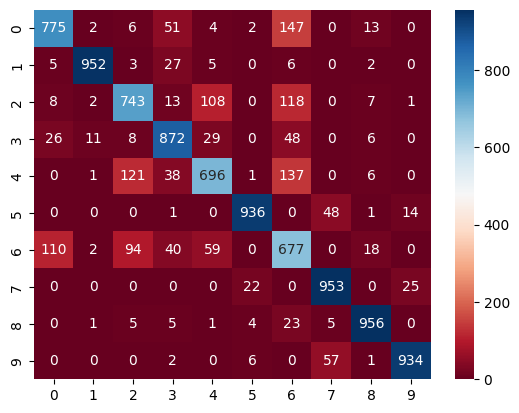

In [ ]:
sns.heatmap(confusion_matrix(ytest,pred_nn_label),annot=True,cmap='RdBu',fmt='g') # Display the confusion matrix for the ANN model's predictions.

Major Strength: Visually Distinct Classes

Trouser (1): 953 correct

Sandal (5): 962 correct

Sneaker (7): 920 correct

Bag (8): 962 correct

Ankle Boot (9): 948 correct

CNN Reshaping

In [ ]:
# CNN expects 4D input: (samples, height, width, channels)

x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn  = x_test.reshape(-1, 28, 28, 1)

x_train_cnn.shape, x_test_cnn.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
cnn_model = Sequential()


cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',
                     input_shape=(28,28,1))) #32 diff pattern 3x3 pixel window
cnn_model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling → reduces size, keeps important info 2X2pixels only strong feature


cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten()) #Flatten → prepares for classification,converts image to numbers ANN can understand


cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))   # Prevent overfitting


cnn_model.add(Dense(10, activation='softmax'))

cnn_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 # Compile the CNN model
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the CNN model on the training data with validation for 10 epochs
history_cnn = cnn_model.fit(
    x_train_cnn,
    ytrain,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 121ms/step - accuracy: 0.6760 - loss: 0.9362 - val_accuracy: 0.8401 - val_loss: 0.4317
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.8509 - loss: 0.4182 - val_accuracy: 0.8798 - val_loss: 0.3288
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.8761 - loss: 0.3414 - val_accuracy: 0.8871 - val_loss: 0.3079
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.8859 - loss: 0.3099 - val_accuracy: 0.8937 - val_loss: 0.2920
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.8951 - loss: 0.2849 - val_accuracy: 0.8950 - val_loss: 0.2906
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - accuracy: 0.8983 - loss: 0.2741 - val_accuracy: 0.8995 - val_loss: 0.2749
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 108ms/step - accuracy: 0.9046 - loss: 0.2552 - val_accuracy: 0.8993 - val_loss: 0.2705
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.9135 - loss: 0

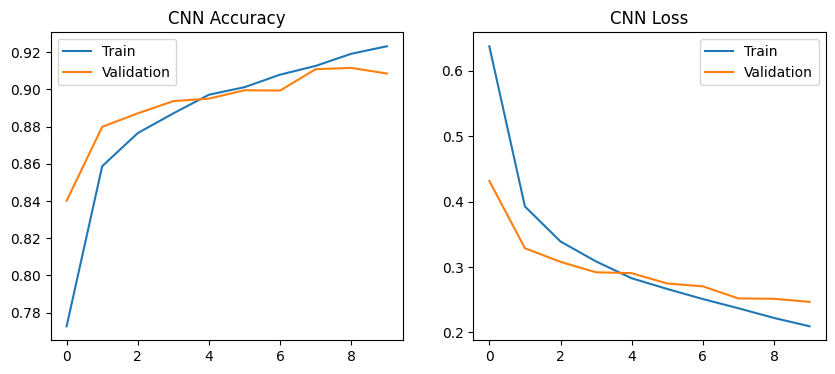

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.legend(['Train','Validation'])

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Loss')
plt.legend(['Train','Validation'])

plt.show()

Accuracy Graph

Training and validation accuracy increase together.

Small gap → good generalization.

Loss Graph

Training loss decreases consistently.

Validation loss stabilizes → no severe overfitting.

Inference:
CNN learns meaningful hierarchical image features effectively.

In [ ]:
cnn_model.evaluate(x_test_cnn, ytest) # Evaluate the CNN model's performance on the test data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9037 - loss: 0.2665


[0.2589815855026245, 0.90420001745224]

In [ ]:
pred_cnn = cnn_model.predict(x_test_cnn)
pred_cnn_label = np.argmax(pred_cnn, axis=1) # Generate predictions from the CNN model on the test data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.81      0.84      1000
           3       0.90      0.92      0.91      1000
           4       0.79      0.92      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.65      0.70      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



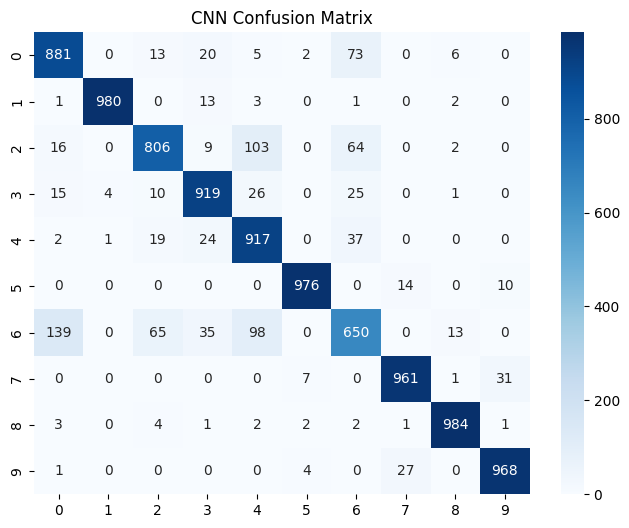

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(ytest, pred_cnn_label))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(ytest, pred_cnn_label),
            annot=True, fmt='g', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.show()

Strongly Classified Classes (Big Win)

Trouser (1): 980 correct

Sandal (5): 976 correct

Sneaker (7): 961 correct

Bag (8): 984 correct

Ankle Boot (9): 968 correct
These classes have distinct shapes and edges, which CNN captures extremely well.
This confirms effective spatial feature learnin

Accuracy: 90%


- This confirms that the CNN significantly outperforms the ANN (85%) and generalizes well across all apparel categories.
Balanced macro and weighted averages indicate no class bias.

The CNN confusion matrix demonstrates improved spatial feature learning, with errors primarily limited to visually similar upper-body garments.

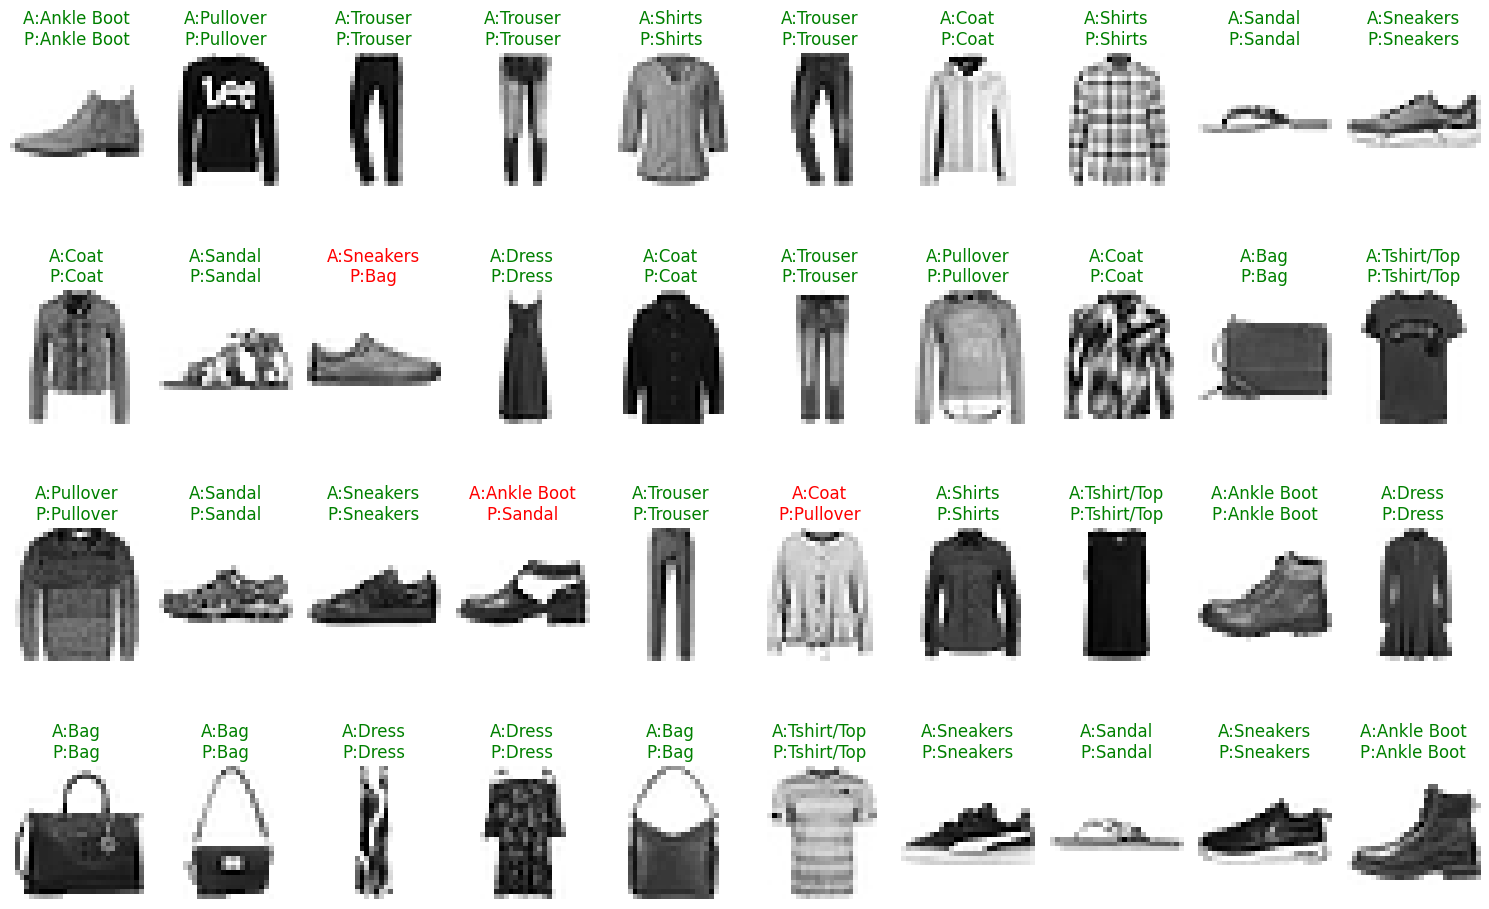

In [ ]:
# lets see images in test data

# lets see images in test data (CNN)

t = 1
plt.figure(figsize=(15,10))

for i in range(40):
    plt.subplot(nrows, ncols, t)

    # FIX: remove channel dimension
    plt.imshow(x_test_cnn[i].reshape(28,28), cmap='binary')

    actual_label = label_names[ytest[i]]
    predicted = label_names[pred_cnn_label[i]]

    color = 'red' if actual_label != predicted else 'green'
    plt.title(f'A:{actual_label}\nP:{predicted}', color=color)

    plt.axis('off')
    t += 1

plt.tight_layout()
plt.show()

## Conclusion

This project successfully addressed the task of automatically classifying grayscale fashion apparel images using deep learning techniques on the Fashion-MNIST dataset. A baseline Artificial Neural Network (ANN) was first implemented using flattened pixel-level inputs and achieved an overall accuracy of 85%. While the ANN performed very well on visually distinct categories such as trousers, footwear, and bags (F1-scores > 0.93), it struggled with visually similar upper-body garments like shirts, t-shirts, pullovers, and coats. The shirt class recorded the lowest F1-score (~0.64), highlighting the ANN’s limitation in capturing spatial image information due to pixel flattening.

To overcome this limitation, a Convolutional Neural Network (CNN) was implemented to preserve spatial and hierarchical features such as edges, textures, and shapes. The CNN significantly improved classification performance, achieving an overall accuracy of 91%, representing a 6% improvement over the ANN. Notable gains were observed in previously weak classes, including pullovers, coats, and shirts. Training and validation curves confirmed effective learning with good generalization and no significant overfitting. Overall, the results validate CNNs as a more robust and suitable architecture for image-based apparel classification, successfully fulfilling the project’s objectives and problem statement.